## Manual sanity checks for the formula within erratum.tex
***

#### Check fitting formula by hand, and compare with raw data

In [2]:
%matplotlib inline

from numpy import exp,sqrt,log,linspace,pi,sin

from os import system

import matplotlib as mpl
from matplotlib.pyplot import *
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.size'] = 12
mpl.rcParams['axes.labelsize'] = 20
mpl.rcParams['font.weight'] = 'normal'
# print mpl.rcParams.keys()

#### Load data file that contains QNM amplitudes from fitting algorithm described in arXiv:1404.3197
---

In [3]:
########################################################################
# NOTE THAT THESE MUST BE CONSISTENT WITH THE HARD CODED EQUATIONS BELOW
########################################################################

# Define QNM indeces of interest
l = 3; m = 2; n = 0;

In [4]:
########################################################################
# NOTE: USERS SHOULD SKIP OR DELETE THIS CELL
########################################################################

# Define data storage location and full path of data file
storage_dir = '/Users/book/GARREG/Spectroscopy/Ylm_Depictions/NonPrecessing/MULTI_DATA_6/Misc/data/'
if l==m:
    data_file_string = './data/complex_A_on_eta_2212%i%i%i1_l_eq_m.asc' % (l,m,n)
else:
    data_file_string = './data/complex_A_on_eta_2212%i%i%i1_l_eq_m_minus_1.asc' % (l,m,n)

# Copy the data to the local repository location
system( 'cp %s/*.asc ./data/' % storage_dir );

In [5]:
# Load the ascii data
data = np.loadtxt(data_file_string)

In [6]:
# Raw data values
raw_eta = data[:,0]
raw_A = data[:,2] + 1j*data[:,3]
A_err = data[:,4]
raw_jf = data[:,8]
raw_Mf = data[:,6]
# Domain over which to evaluate fits
eta = linspace(0,0.25,200)

#### Implement Final Mass and Spin Fits from arXiv:1404.3197 and Plot against data
---

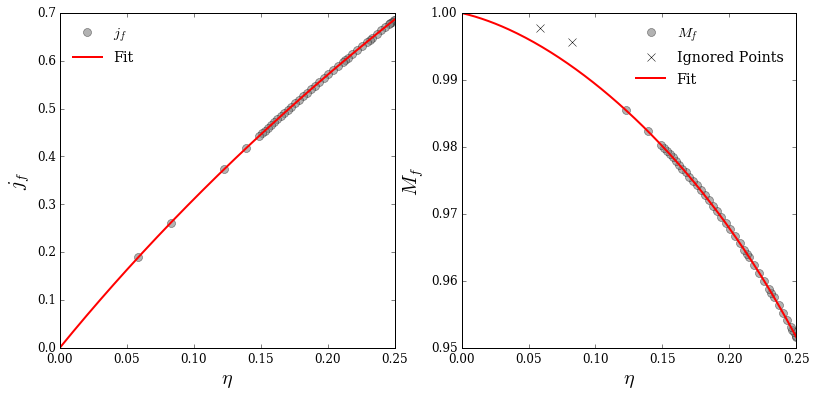

In [7]:
# Implement Final Mass and Spin Fits from arXiv:1404.3197
jfit = lambda ETA: ETA * ( 3.4339 - 3.7988*ETA + 5.7733*ETA**2 - 6.3780*ETA**3 )
Mfit = lambda ETA: 1.0 + ETA * ( -0.046297 + -0.71006*ETA + 1.5028*ETA**2 + -4.0124*ETA**3 + -0.28448*ETA**4 )

# Verify Fits with plot
figure(figsize=1.2*np.array((11, 5)), dpi=120, facecolor='w', edgecolor='k')

subplot(1,2,1)
plot( raw_eta, raw_jf, 'o', alpha=0.6, label=r'$j_f$', color=0.5*np.array([1,1,1]),markersize=8 )
plot( eta, jfit(eta), '-r', label='Fit' )
xlabel(r'$\eta$')
ylabel(r'$j_f$')
legend(loc='upper left',numpoints=1,frameon=False)

a = subplot(1,2,2)
plot( raw_eta[:-2], raw_Mf[:-2], 'o', alpha=0.6, label=r'$M_f$', color=0.5*np.array([1,1,1]),markersize=8 )
plot( raw_eta[-2:], raw_Mf[-2:], 'x', label=r'Ignored Points', color='k',markersize=8 )
plot( eta, Mfit(eta), '-r', label='Fit' )
xlabel(r'$\eta$')
ylabel(r'$M_f$')
legend(loc='upper right',numpoints=1,frameon=False)

#### Implement Model for $M_f \omega (\eta)$
---

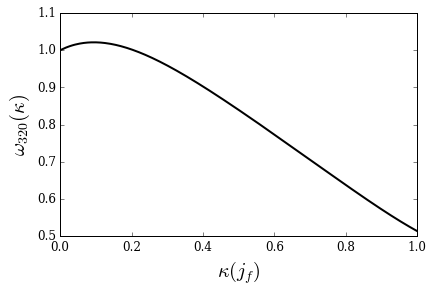

In [8]:
K    = lambda jf: ( log(2.0-jf)/log(3.0) )**(1.0 / (2.0 + l - m) )
Mwfit= { (2,2,0) : lambda JF: 2.0/2 + K(JF) * ( 1.5557*exp(2.9034j) + 1.9311*exp(5.9219j)*K(JF) + 2.0417*exp(2.7627j)*K(JF)**2 + 1.3436*exp(5.9187j)*K(JF)**3 + 0.3835*exp(2.8029j)*K(JF)**4 ),
         (3,2,0) : lambda JF: 2.0/2 + K(JF) * ( 0.5182*exp(0.3646j) + 3.1469*exp(3.1371j)*K(JF) + 4.5196*exp(6.2184j)*K(JF)**2 + 3.4336*exp(3.0525j)*K(JF)**3 + 1.0929*exp(6.1713j)*K(JF)**4 ) }
wfit = lambda ETA: Mwfit[(l,m,n)](jfit(ETA)) / Mfit(ETA)

#
figure(figsize=0.8*np.array((8, 5)), dpi=120, facecolor='w', edgecolor='k')

#
jf_test = sin( 0.5*pi*linspace( -1,1, 1e3 ) )
plot( K(jf_test), Mwfit[(l,m,n)](jf_test).real, 'k' )
xlabel('$\kappa(j_f)$')
ylabel('$\omega_{%i%i%i}(\kappa)$'%(l,m,n))

### Plot Fit on Raw Data as well as residuals: Note that error bars do not take into account NR error, only cross-validation errors 

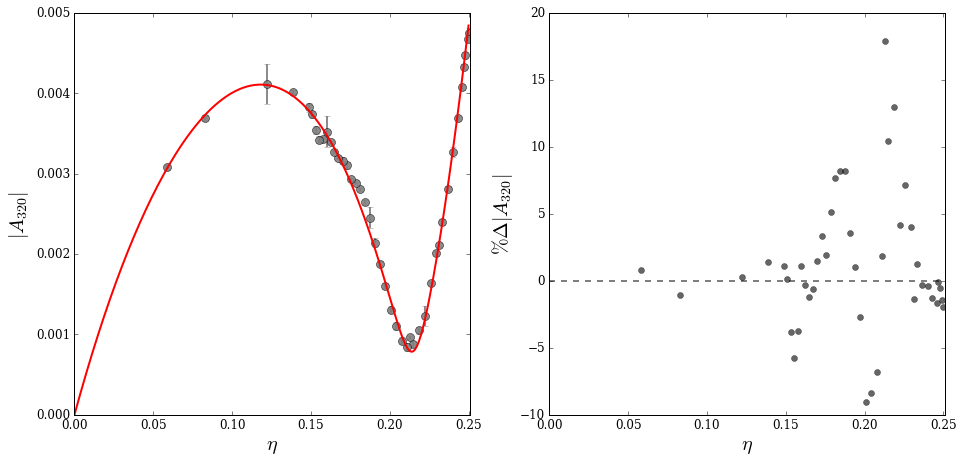

In [12]:
#
Afit = { (2,2,0) : lambda ETA: (wfit(ETA)**2) * ( 0.9252*ETA + 0.1323*ETA**2 ),
         (3,2,0) : lambda ETA: (wfit(ETA)**2) * ( 0.1957*exp(5.8008j)*ETA + 1.5830*exp(3.2194j)*ETA**2 + 5.0338*exp(0.6843j)*ETA**3 + 3.7366*exp(4.1217j)*ETA**4 ) }

#
figure(figsize=1.2*np.array((13, 6)), dpi=120, facecolor='w', edgecolor='k')

# Make Subplot
ax1 = subplot(1,2,1)
errorbar( raw_eta, abs(raw_A),fmt='o', yerr=A_err, alpha=0.9, label=r'$A_{lmn}$', color=0.5*np.array([1,1,1]),markersize=8 )
plot( eta, abs(Afit[(l,m,n)](eta)), '-r' )
# Label Axes
xlabel(r'$\eta$')
xlim( [0,0.251] )
ylabel(r'$|A_{%i%i%i}|$'%(l,m,n))

# Make Subplot
subplot(1,2,2)
plot( raw_eta, 100*(abs(raw_A)-abs(Afit[(l,m,n)](raw_eta)))/abs(raw_A), 'ok', alpha=0.6 )
plot( ax1.get_xlim(), [0,0], '--k', alpha=0.5 )
# Label Axes
xlabel(r'$\eta$')
xlim(ax1.get_xlim())
ylabel(r'$\%%\Delta|A_{%i%i%i}|$'%(l,m,n))

# Save the plot
savefig('review_A%i%i%i_Amp.pdf'%(l,m,n))